# 第5章　教師あり学習：回帰　

取り扱う内容
- 機械学習の中で最も重要とされているのは**教師あり学習** 
- 教師あり学習は**回帰**と**分類**に分かれ，5章は**回帰**を扱う
- 回帰は入力に対して連続した数値を対応付ける問題，分類は入力に対して順番のないクラス(ラベル)を対応付ける問題(詳しくは6章)

## 5.1　1次元入力の直線モデル

今回の問題では16人($N$)の年齢($x$)と身長($t$)考える
- $x_n$を**入力変数**，$t_n$を**目標変数(ターゲット)**，$N$をインデックスとする
- さらにすべてのデータを集めた$x$を**入力データ**，$t$を**目標データ**と呼ぶ

ここでの目的はデータベースにない人の年齢$x$に対して，その人の身長$t$を予測する関数を作ること

まずはリスト5-1-(1)で年齢と身長の人工データを作成する

In [1]:
#リスト 5-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#データ生成 
np.random.seed(seed=1)            # 乱数を固定
X_min = 4                         # X の下限（表示用）
X_max = 30                        # X の上限（表示用）
X_n = 16                          # データの個数
X = 5 + 25 * np.random.rand(X_n)  # X の生成
Prm_c = [170, 108, 0.2]           # 生成パラメータ
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X)+ 4 * np.random.randn(X_n)    #(A)                    
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)        #(B)


16人の年齢$x$をランダムに決定し，(A)によって身長$t$を決定している．

次のリスト5-1-(2)では$x$を表示している

In [2]:
# リスト 5-1-(2)
print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


np.roundを使うことで四捨五入した表記で出力することができる

In [3]:
# リスト 5-1-(3)
print(np.round(X, 2)) #少数第2位まで表示する

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


次は同様に$t$を表示する

In [4]:
#リスト 5-1-(4)
print(np.round(T, 2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


今度はこの2つのデータをグラフに表す

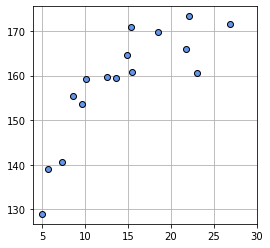

In [5]:
#リスト 5-1-(5)
#データグラフ表示 
plt.figure(figsize=(4, 4))
plt.plot(X, T, marker='o', linestyle='None', 
         markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

### 5.1.1　直線モデル

上記のグラフでは年齢x(横軸)と身長t(縦軸)にばらつきがある．\
しかし，ある程度の誤差を許すことができれば直線を引くことである年齢xに対しておおよその身長tを予想することができる．\
ここで，直線の式を以下のように定義する．
$$
    y(x)=w_0x+w_1
$$

この式を**直線モデル**と呼ぶことにする．\
$w_0$は傾きを表し，$w_1$は切片を表す．この$w_0$と$w_1$をうまくきめることでデータを正しく予想することができる．

### 5.1.2　二乗誤差関数

ここからは平均誤差を使っていく．\
平均二乗誤差とは直線式から得られた値と実際の値の二乗の平均である．\
ここでは平均二乗誤差$J$(プログラム上ではMSEと表記する)を以下のように定義する．
$$
    J=\frac{1}{N}\sum_{n=0}^{N-1}(y_n-t_n)^2 
$$

ただし，ここで使われる$y_n$は以下のものとする．
$$
    y_n=y(x_n)=w_0x_n+w_1
$$

以降では，$w_0(傾き)，w_1(切片)$と$J(誤差)$の関係をプロットしてみる． 

In [6]:
#リスト5-1-(6)
from mpl_toolkits.mplot3d import Axes3D

#平均誤差関数
def mse_line(x,t,w):
    y=w[0]*x+w[1]
    mse=np.mean((y-t)**2)
    return mse

In [7]:
#計算
xn=100 #等高線の解像度
w0_range=[-25,25]
w1_range=[120,170]
w0=np.linspace(w0_range[0],w0_range[1],xn)
w1=np.linspace(w1_range[0],w1_range[1],xn)
ww0,ww1=np.meshgrid(w0,w1)
J=np.zeros((len(w0),len(w1)))
for i0 in range(len(w0)):
    for i1 in range(len(w1)):
        J[i1,i0]=mse_line(X,T,(w0[i0],w1[i1]))
        

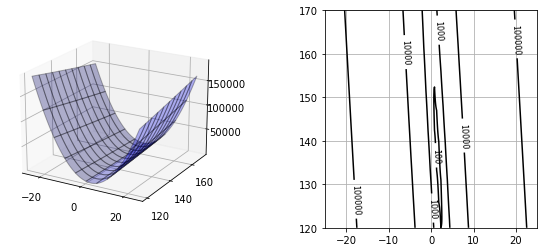

In [8]:
#表示
plt.figure(figsize=(9.5,4))
plt.subplots_adjust(wspace=0.5)

ax=plt.subplot(1,2,1,projection='3d')
ax.plot_surface(ww0,ww1,J,rstride=10,cstride=10,alpha=0.3,color='blue',edgecolor='black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(20,-60)

plt.subplot(1,2,2)
cont=plt.contour(ww0,ww1,J,30,colors='black',levels=[100,1000,10000,100000])
cont.clabel(fmt='%d',fontsize=8)
plt.grid(True)
plt.show()

左のグラフでは$J(平均二乗誤差)$，$w_0(傾き)$，$w_1(切片)$の関係性を表したグラフである．\
$w$の空間において平均二乗誤差($J$)は谷のような形をしている．実際にグラフを見ていくと$w_0$方向の変化に対して$J$は大きく変化している．\
傾きが変化してしまうことで直線はデータの点から大きく外れてしまうからである．\
ここで，$w_1$の変化を見やすくするために等高線のグラフを用いる．それが右のグラフである．\
すると，谷の底においても$w_1$方向において高さが少しずつ変化していることがわかる．\
(おそらく$w_0=3$，$w_1=135$の時が$J$の最小値になっていそうである)

### 5.1.3　パラメータを求める(勾配法)

ここでは，$J(平均二乗誤差)$が最小になる$w_0$，$w_1$を決定するアルゴリズムを考える．\
今回取り扱うものは**勾配法(最急降下法)**と呼ばれる方法で用いていく．**勾配法**のアルゴリズムは以下の通りである．

1.初期位置として適当な$w_0$,$w_1$を決定する．\
2.決めた$w_0$,$w_1$において傾きを求める．\
3.その後，$J(平均二乗誤差)$が減少する方向へ$w_0$と$w_1$を少しだけ進めていく．\
4.$J$が最も小さくなるように2,3を繰り返すようにする．\
(お椀の底を探索するようなイメージ)

この勾配法をもう少し詳しく見てみる．\
まずはある点($w_0$，$w_1$)を考える．この点において上方向に$J$を$w_0$，$w_1$をで偏微分したベクトルを
$$
\begin{bmatrix}
\frac{\partial J}{\partial w_0} & \frac{\partial J}{\partial w_1} \\
\end{bmatrix}^\top \
$$
とし，これを**$J$の勾配(グラディエント)**と呼び，$\nabla _{w}J$とする．今回，$J$を最小にするためには$-\nabla _{w}J$の方向に進めば良いと分かる．

$w$の更新方法(学習則)を$\nabla wJ$を用いて行列表記で表すと以下のようになる．
$$
w(\tau ＋１)＝w(\tau )−\alpha \nabla _{w}J|_{w(\tau )}
$$
$\nabla _{w}J|_{w(\tau )}$において，$\nabla _{w}J$という$w$の関数に現在の$w$の値$w(\tau)$を代入した値という風に表している．\
また，$\alpha$は*学習率*と呼ばれる正の値をとるパラメータであり$w$の更新の幅を調整するものである．
学習則を成分表記すると以下のようになる．
$$
w_{0}(\tau ＋１)＝w_{0}(\tau )−\alpha　\frac{\partial J}{\partial w_0}|_{w_{0}(\tau )，w_{1}(\tau )}　\\
w_{1}(\tau ＋１)＝w_{1}(\tau )−\alpha　\frac{\partial J}{\partial w_0}|_{w_{0}(\tau )，w_{1}(\tau )}　\\ 
$$
上記の2つの式を使い，偏微分の計算を行うと以下の通りになる．(詳細は教科書P154)
$$
w_{0}(\tau ＋１)＝w_{0}(\tau )−\alpha　\frac{2}{N}\sum_{n=0}^{N-1}(y_{n}-t_{n})x_{n} 　\\
w_{1}(\tau ＋１)＝w_{1}(\tau )−\alpha　\frac{2}{N}\sum_{n=0}^{N-1}(y_{n}-t_{n})x_{n} 　\\
$$
以降はこの学習則を用いてプログラムを実装していく．

In [9]:
#リスト5-1-(7)
#平均二乗誤差の勾配
def dmse_line(x,t,w):
    y=w[0]*x+w[1]
    d_w0=2*np.mean((y-t)*x)
    d_w1=2*np.mean(y-t)
    return d_w0,d_w1

試しに，$w$が[10.165]の値の場合について求めてみる．

In [10]:
#リスト5-1-(8)
d_w=dmse_line(X,T,[10,165])
print(np.round(d_w,1))

[5046.3  301.8]


ここで，出力されるものはそれぞれ$w_0，w_1$方向の傾きである．\
以下のプログラムでは初期パラメータを[10,165]，学習率$\alpha$は0.001とし，勾配の各要素の絶対値が0.1より小さくなると繰り返しを終了するというものにしている．

In [11]:
#リスト5-1-(9)
#勾配法
def fit_line_num(x,t):
    w_init=[10.0,165.0] #初期パラメータ
    alpha=0.001 #学習率
    tau_max=100000 #繰り返しの最大数
    eps=0.1 #繰り返しをやめる勾配の絶対値のしきい値
    w_hist=np.zeros([tau_max,2])
    w_hist[0,:]=w_init
    for tau in range(1,tau_max):
        dmse=dmse_line(x,t,w_hist[tau-1])
        w_hist[tau,0]=w_hist[tau-1,0]-alpha*dmse[0]
        w_hist[tau,1]=w_hist[tau-1,1]-alpha*dmse[1]
        if max(np.absolute(dmse))<eps: #終了判定
            break
    w0=w_hist[tau,0]
    w1=w_hist[tau,1]
    w_hist=w_hist[:tau,:]
    return w0,w1,dmse,w_hist


繰り返し回数13820
W=[1.539947,136.176160]
dMSE=[-0.005794,0.099991]
MSE=49.027452


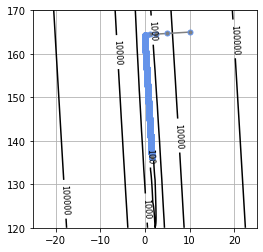

In [12]:
#メイン
plt.figure(figsize=(4,4))
#MSEの等高線表示
wn=100 #等高線の解像度
w0_range=[-25,25]
w1_range=[120,170]
w0=np.linspace(w0_range[0],w0_range[1],wn)
w1=np.linspace(w1_range[0],w1_range[1],wn)
ww0,ww1=np.meshgrid(w0,w1)
J=np.zeros((len(w0),len(w1)))
for i0 in range(wn):
    for i1 in range(wn):
        J[i1,i0]=mse_line(X,T,(w0[i0],w1[i1]))
cont=plt.contour(ww0,ww1,J,30,colors='black',levels=(100,1000,10000,100000))
cont.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)
#勾配法呼び出し
w0,w1,dMSE,W_history=fit_line_num(X,T)
#結果表示
print('繰り返し回数{0}'.format(W_history.shape[0]))
print('W=[{0:.6f},{1:.6f}]'.format(w0,w1))
print('dMSE=[{0:.6f},{1:.6f}]'.format(dMSE[0],dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X,T,[w0,w1])))
plt.plot(W_history[:,0],W_history[:,1],'.-',color='gray',markersize=10,markeredgecolor='cornflowerblue')
plt.show()

はじめは勾配の強い谷の方向に進み，谷底に落ち着くと谷底の中で中央付近にゆっくり進んでいっている．\
その後，勾配がほとんどなくなる地点に到達していることが分かる．\
(お椀の底付近に到達出来たことを表す)

では，ここで求めた$w_{0}，w_{1}$は実際にどうなのかをデータの上に重ねてみる．

In [13]:
#リスト5-1-(10)
#線の表示
def show_line(w):
    xb=np.linspace(X_min,X_max,100)
    y=w[0]*xb+w[1]
    plt.plot(xb,y,color=(.5,.5,.5),linewidth=4)
    

w0=1.540,w1=136.176
SD=7.002cm


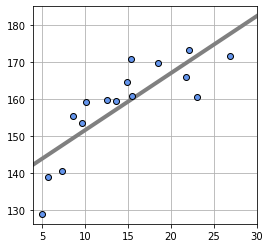

In [14]:
#メイン
plt.figure(figsize=(4,4))
W=np.array([w0,w1])
mse=mse_line(X,T,W)
print("w0={0:.3f},w1={1:.3f}".format(w0,w1))
print("SD={0:.3f}cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X,T,marker='o',linestyle='None',color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

重ねた場合の平均二乗誤差$J$は49.03という値であった．\
この値はあくまで二乗しているものであるので実際の直線とデータのズレは約7.002になる．\
また，平均二乗誤差の平方根を**標準偏差(SD)**と呼ぶ．

*　補足\
ここで注意する点は勾配法で求める解は必ずしも最適な解であるわけではない．\
今回はお椀のような形をしているものだが，これが複雑な形になるとなかなか良い解が得られない可能性がある．

### 5.1.4　直線モデルパラメータの解析解

*補足でも示したとおり．勾配法はあくまで近似的な値を求める手法であった．このような解を**数値解**という．\
それに対して直線モデルの場合では方程式を解くことによって最適な解を見つけることができる．この解を**解析解**という．\
解析解は数値解と比べて計算時間も早く，解も正確である．

ここでは，実際に先程の問題の解析解についてみていく．
教科書(P160〜162)までの手順にしたがって解析解を求めていく．\
すると，$w_0，w_1$は以下のように決まる．
$$
w_{0}=\frac{<tx>-<t><x>}{<x^2>-<x>^2} \\
w_{1}=<t>-\frac{<tx>-<t><x>}{<x^2>-<x>^2}<x> \\
$$

$<x>,<x^2>,<tx>$は以下のとおりとする．(要は$x$の平均，$x^2$の平均，$tx$の平均である)
$$
<x>=　\frac{1}{N}\sum_{n=0}^{N-1}x_{n} \\
<x^2>=　\frac{1}{N}\sum_{n=0}^{N-1}x^2_{n} \\
<tx>=　\frac{1}{N}\sum_{n=0}^{N-1}t_{n}x_{n} \\ 
$$
よって，<x^2>と<x>^2はそれぞれ異なる値をとるので注意する．($<x^2>$は$x^2$の平均であり，$<x>^2$は$x$の平均の二乗である)
    
これらを踏まえて，プログラムを見ていく．

In [15]:
#リスト5-1-(11)
#解析解
def fit_line(x,t):
    mx=np.mean(x)
    mt=np.mean(t)
    mtx=np.mean(t*x)
    mxx=np.mean(x*x)
    w0=(mtx-mt*mx)/(mxx-mx**2)
    w1=mt-w0*mx
    return np.array([w0,w1])

w0=1.558,w1=135.872
SD=7.001cm


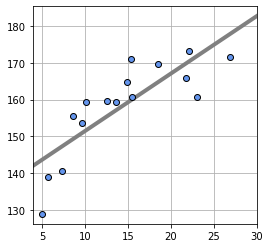

In [16]:
#メイン
W=fit_line(X,T)
print("w0={0:.3f},w1={1:.3f}".format(W[0],W[1]))
mse=mse_line(X,T,W)
print("SD={0:.3f}cm".format(np.sqrt(mse)))
plt.figure(figsize=(4,4))
show_line(W)
plt.plot(X,T,marker='o',linestyle='None',color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

先ほどと同様に，実際のデータに重ねてみると上の図のようになる．\
データとのズレである標準偏差(SD)が7.001であるところを見ると，先程の勾配法と比べるとこちらの方がより正確な値を示していることが確認できる．

# 5.2　2次元入力の面モデル

ここでは，入力が2次元$x=(x_{0}，x_{1})$の場合を考える．

そこで，体重は身長の二乗に比例するということを用いて以下のように式を定義する．
$$
体重(kg)=23×(\frac{身長(cm)}{100})^2+noise 
$$
ただし，BMI指数(人の体格指数)は23とする．

以降はこのデータを用いてプログラムを見ていく．

In [17]:
#リスト5-1-(12)
#2次元データ生成
X0=X
X0_min=5
X0_max=30
np.random.seed(seed=1) #乱数を固定
X1=23*(T/100)**2+2*np.random.randn(X_n)
X1_min=40
X1_max=75

In [18]:
#リスト5-1-(13)
print(np.round(X0,2))
print(np.round(X1,2))
print(np.round(T,2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


In [19]:
#リスト5-1-(14)
#2次元データの表示
def show_data2(ax,x0,x1,t):
    for i in range(len(x0)):
        ax.plot([x0[i],x0[i]],[x1[i],x1[i]],[120,t[i]],color='gray')
    ax.plot(x0,x1,t,'o',color='cornflowerblue',markeredgecolor='black',markersize=6,markeredgewidth=0.5)
    ax.view_init(elev=35,azim=-75)

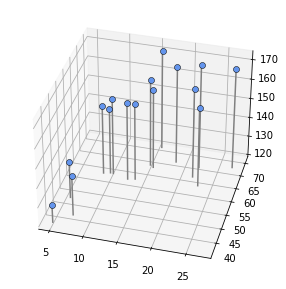

In [20]:
#メイン
plt.figure(figsize=(6,5))
ax=plt.subplot(1,1,1,projection='3d')
show_data2(ax,X0,X1,T)
plt.show()

上の図より年齢が上がれば上がるほど，また体重が増えれば増えるほど，身長が高くなるという傾向になっている．

### 5.2.1　データの表し方

ここでは，数式を書く上でのデータの表し方について見ていく．

今回はデータ番号(個人の番号)を$n$,ベクトルの要素(0は年齢，1は体重とする)を$m$とし，$x_{n,m}$と表記する．\
また，教科書ではデータ番号$n$の$x$のすべての要素をまとめて書くときは，太字で縦ベクトルで表すようにする．

$$
\mathbf{x_{n}}=
\begin{bmatrix}
x_{n,0}\\
x_{n,1}\\
\vdots \\
x_{n,M-1} \\
\end{bmatrix}
$$

行列全体のときは大文字の太字の$X$を使う．
$$
\mathbf{X}=
\begin{bmatrix}
x_{0,0} & x_{0,1} & \cdots & x_{0,M-1}\\
x_{1,0} & x_{1,1} & \cdots & x_{1,M-1}\\
\vdots & \vdots & \ddots & \vdots \\
x_{N-1,0} & x_{N-1,1} & \cdots & x_{N-1,M-1}\\ \\
\end{bmatrix}
$$

$m$次元でまとめて表記する場合は横ベクトルで表す．
$$
\mathbf{x_{m}}=
\begin{bmatrix}
x_{0,m} & x_{1,m} & \cdots & x_{N-1,m}\\
\end{bmatrix}
$$

$t$についてまとめるときは 
$$
\mathbf{t}=
\begin{bmatrix}
t_{0}\\
t_{1}\\
\vdots \\
t_{N-1} \\
\end{bmatrix}
$$


### 5.2.2　面モデル

今回のデータは，$N$個の2次元ベクトル$\mathbf{x_{n}}$に対してそれぞれ$t_{n}$が割り当てられている．
これらの関係性を見るためには3dでプロットすると分かりやすい．そこで，面を表示するshow_plane，そして平均二乗誤差を計算するmse_planeの2つを定義する．

In [21]:
#リスト5-1-(15)
#面の表示
def show_plane(ax,w):
    px0=np.linspace(X0_min,X0_max,5)
    px1=np.linspace(X1_min,X1_max,5)
    px0,px1=np.meshgrid(px0,px1)
    y=w[0]*px0+w[1]*px1+w[2]
    ax.plot_surface(px0,px1,y,rstride=1,cstride=1,alpha=0.3,color='blue',edgecolor='black')

In [22]:
#面のMSE
def mse_plane(x0,x1,t,w):
    y=w[0]*x0+w[1]*x1+w[2] #(A)
    mse=np.mean((y-t)**2)
    return mse

SD=21.10cm


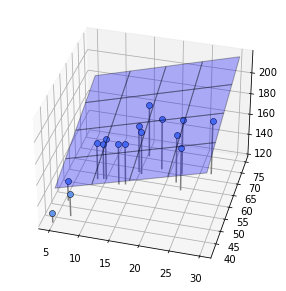

In [23]:
#メイン
plt.figure(figsize=(6,5))
ax=plt.subplot(1,1,1,projection='3d')
W=[1.5,1,99]
show_plane(ax,W)
show_data2(ax,X0,X1,T)
mse=mse_plane(X0,X1,T,W)
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()

面の関数は以下のように定義される．
$$
y(x)=w_{0}x_{0}+w_{1}x_{1}+w_{2}
$$
座標$(x_{0},x_{1},y)$に対して点を打っていくイメージである．それらをあらゆる$(x_{0},x_{1})$で行うとそれが面になる．

### 5.2.3　面モデルパラメータの解析解

直線モデルと同様に面モデルにおいて教科書(P169〜P170)までの手順で解析解を求めていく．
すると，$w_{0}，w_{1}，w_{2}$は以下のとおりになる．
$$
w_{0}=\frac{cov(t,x_{1})cov(x_{0},x_{1})-var(x_{0})cov(t,x_{0})}{cov(x_{0},x_{1})^2-var(x_{0})var(x_{1})} \\
w_{1}=\frac{cov(t,x_{0})cov(x_{0},x_{1})-var(x_{0})cov(t,x_{1})}{cov(x_{0},x_{1})^2-var(x_{0})var(x_{1})} \\
w_{2}=-w_{0}<x_{0}>-w_{1}<x_{1}>+<t> \\
$$

ただし，
$$
var(a)=<a^2>-<a>^2　\\
cov(a,b)=<ab>-<a><b>　\\
$$
とする．(要するにvar(a)がaについての**分散**，cov(a,b)がa,bの**共分散**にあたる)

In [24]:
#リスト5-1-(16)
#解析解
def fit_plane(x0,x1,t):
    c_tx0=np.mean(t*x0)-np.mean(t)*np.mean(x0)
    c_tx1=np.mean(t*x1)-np.mean(t)*np.mean(x1)
    c_x0x1=np.mean(x0*x1)-np.mean(x0)*np.mean(x1)
    v_x0=np.var(x0)
    v_x1=np.var(x1)
    w0=(c_tx1*c_x0x1-v_x1*c_tx0)/(c_x0x1**2-v_x0*v_x1)
    w1=(c_tx0*c_x0x1-v_x0*c_tx1)/(c_x0x1**2-v_x0*v_x1)
    w2=-w0*np.mean(x0)-w1*np.mean(x1)+np.mean(t)
    return np.array([w0,w1,w2])

w0=0.5,w1=1.1,w2=89.0
SD=2.55cm


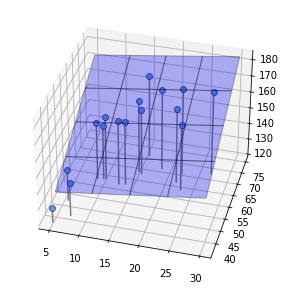

In [25]:
#メイン
plt.figure(figsize=(6,5))
ax=plt.subplot(1,1,1,projection='3d')
W=fit_plane(X0,X1,T)
print("w0={0:.1f},w1={1:.1f},w2={2:.1f}".format(W[0],W[1],W[2]))
show_plane(ax,W)
show_data2(ax,X0,X1,T)
mse=mse_plane(X0,X1,T,W)
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()

ここで注目するのは，標準偏差(SD)が2.55になったというところである．年齢だけで身長を予測するよりは年齢と体重の2つの情報の方が予測の精度が上がるということである．

# 5.3　D次線形回帰モデル

ここでは，取り扱うデータが3次元，4次元，それよりも多くの次元の場合はどうなるのかを考えていく．\
1つ1つの次元で公式を求めるのではなく，次元数を変数として(D次元)として公式を求めていく．

### 5.3.1　D次元線形回帰モデル

直線モデル，面モデルをまとめて**線形回帰モデル**という．\
これを一般的に表すと以下のようになる．
$$
y(\mathbf x)=w_{0}x_{0}+w_{1}x_{1}+\cdots+w_{D-1}x_{D-1}+w_{D}
$$
最後の$w_{D}$は切片を表している．教科書では簡単なモデルを扱うためこの切片はないものとして考えている．

このモデルを行列表現を用いて表すと以下のようになる．
$$
y(\mathbf x)=
\begin{bmatrix} w_{0} &\cdots &w_{D-1} \end{bmatrix} 
\begin{bmatrix} x_{0}\\ \vdots \\ x_{D-1}  \end{bmatrix} 
=\mathbf w^T\mathbf x
$$ 

### 5.3.2　パラメータの解析解

教科書(P174〜177)の手順にしたがって解析解を求めていく．\
すると，以下のとおりになる．
$$
\mathbf w=(\mathbf X^T \mathbf X)^{-1}\mathbf X^Tt
$$
*　注意　\
ここでは結果だけしか示していませんが，手順はしっかり教科書の方を確認してください．本書曰くここが「峠」らしいです．



### 5.3.3　原点を通らない面への拡張

D次元において，原点を通らない面を考える際はD+1次元目に常に1をとる要素を追加すれば自由に動くことのできるモデルが表現される．

# 5.4　線形基底関数モデル

ここでは，一度話を1次元に戻す．1次元の際は直線モデルを考えていたが誤差を少なくするために今度は曲線モデルについて考える．\
教科書P179では**線形基底モデル**が紹介されている．(基底関数とは元になる関数という意味である)\
以前に出てきた線型回帰モデルの$x$を基底関数$\varphi(x)$に置き換えることで様々な関数をつくるというのが**線形基底モデル**の考え方である．

今回は基底関数としてガウス関数を用いて考えていく．
ガウス関数は以下のとおりである．
$$
\varphi_{j}(x)=exp^{\frac{-(x-\mu_{j})^2}{2s^2}}
$$
基底関数には複数セットで使われるものであるため，$j$というインデックスがついている．
これらを用いて線形基底関数を決定させていく．

In [26]:
#リスト 5-2-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#データのロード
outfile=np.load('ch5_data.npz')
X=outfile['X']
X_min=0
X_max=outfile['X_max']
X_n=outfile['X_n']
T=outfile['T']

In [27]:
#リスト 5-2-(2)
#ガウス関数
def gauss(x,mu,s):
    return np.exp(-(x-mu)**2/(2*s**2))

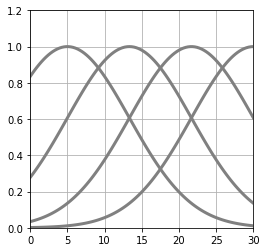

In [28]:
#リスト 5-2-(3)
#メイン
M=4
plt.figure(figsize=(4,4))
mu=np.linspace(5,30,M)
s=mu[1]-mu[0] #(A)
xb=np.linspace(X_min,X_max,100)
for j in range(M):
    y=gauss(xb,mu[j],s)
    plt.plot(xb,y,color='gray',linewidth=3)
plt.grid(True)
plt.xlim(X_min,X_max)
plt.ylim(0,1.2)
plt.show()

ここでは個数が4個のときのガウス基底関数を表示したものである．

In [29]:
#リスト 5-2-(4)
#線形基底関数モデル
def gauss_func(w,x):
    m=len(w)-1
    mu=np.linspace(5,30,m)
    s=mu[1]-mu[0]
    y=np.zeros_like(x) #xと同じサイズで要素が0の行列yを作成
    for j in range(m):
        y=y+w[j]*gauss(x,mu[j],s)
    y=y+w[m]
    return y

In [30]:
#リスト 5-2-(5)
#線形基底関数モデルMSE
def mse_gauss_func(x,t,w):
    y=gauss_func(w,x)
    mse=np.mean((y-t)**2)
    return mse

In [31]:
#リスト 5-2-(6)
#線形基底関数モデルの厳密解
def fit_gauss_func(x,t,m):
    mu=np.linspace(5,30,m)
    s=mu[1]-mu[0]
    n=x.shape[0]
    phi=np.ones((n,m+1))
    for j in range(m):
        phi[:,j]=gauss(x,mu[j],s)
    phi_T=np.transpose(phi)
    
    b=np.linalg.inv(phi_T.dot(phi))
    c=b.dot(phi_T)
    w=c.dot(t)
    return w

In [32]:
#リスト 5-2-(7)
#ガウス基底関数の表示
def show_gauss_func(w):
    xb=np.linspace(X_min,X_max,100)
    y=gauss_func(w,xb)
    plt.plot(xb,y,c=[.5,.5,.5],lw=4)

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98cm


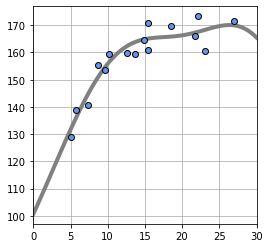

In [33]:
#メイン
M=4
plt.figure(figsize=(4,4))
W=fit_gauss_func(X,T,M)
show_gauss_func(W)
plt.plot(X,T,marker='o',linestyle='None',color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
mse=mse_gauss_func(X,T,W)
print('W='+str(np.round(W,1)))
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()

上の図は線形基底関数モデルを実際のデータの上に重ねたものである．\
直線モデルの場合は標準偏差(SD)が7.001であったのに対して線形基底関数モデルの場合であれば標準偏差(SD)3.98まで小さくすることが出来た．

また，教科書(P181〜P183)の手順に従うことで解析解は以下のとおりになる．
$$
\mathbf{\Phi}=
\begin{bmatrix}
\phi_{0}(x_{0}) & \phi_{1}(x_{0}) & \cdots & \phi_{M}(x_{0})\\
\phi_{0}(x_{1}) & \phi_{1}(x_{1}) & \cdots & \phi_{M}(x_{1})\\
\vdots & \vdots & \ddots & \vdots \\
\phi_{0}(x_{N-1}) & \phi_{1}(x_{N-1}) & \cdots & \phi_{M}(x_{N-1})\\
\end{bmatrix}
$$

# 5.5　オーバーフィッシングの問題

ここでは，基底関数の個数はどうやって決定させるのかを考えていく．
以下のプログラムでは，個数(M)が2個，4個，7個，9個の場合における線形基底関数モデルを使って比較したものになる．

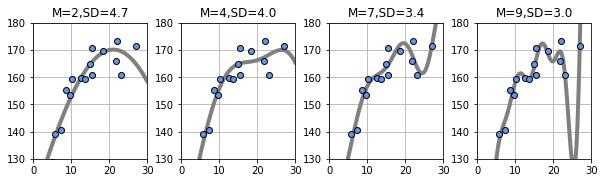

In [34]:
#リスト 5-2-(8)
plt.figure(figsize=(10,2.5))
plt.subplots_adjust(wspace=0.3)
M=[2,4,7,9]
for i in range(len(M)):
    plt.subplot(1,len(M),i+1)
    W=fit_gauss_func(X,T,M[i])
    show_gauss_func(W)
    plt.plot(X,T,marker='o',linestyle='None',color='cornflowerblue',markeredgecolor='black')
    plt.xlim(X_min,X_max)
    plt.grid(True)
    plt.ylim(130,180)
    mse=mse_gauss_func(X,T,W)
    
    plt.title("M={0:d},SD={1:.1f}".format(M[i],np.sqrt(mse)))
plt.show()

個数(M)が増えると誤差の標準偏差(SD)はどんどん減っていくが，ある点において新しい入力に対する予測が困難となってくる．\
この現象を**過学習(オーバーフィッティング)**という．

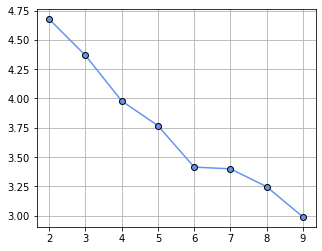

In [35]:
#リスト 5-2-(9)
plt.figure(figsize=(5,4))
M=range(2,10)
mse2=np.zeros(len(M))
for i in range(len(M)):
    W=fit_gauss_func(X,T,M[i])
    mse2[i]=np.sqrt(mse_gauss_func(X,T,W))
plt.plot(M,mse2,marker='o',color='cornflowerblue',markeredgecolor='black')
plt.grid(True)
plt.show()

このグラフで確認できるとおり，Mが増えることによって標準偏差(SD)がどんどん減少していっている．\
データのあるところではデータの点に近付こうとするが，データの無いところでは歪みが生じてしまう．\
これにより，今までデータとの誤差は小さくなるが新しいデータを予測することは困難である．

ここで，少し方針を変えて予測精度を上げていく．\
手持ちのデータを**テストデータ**と**訓練データ**に分割する．\
そして，モデルのパラメータである$\mathbf w$は訓練データのみを用いて最適化していく．\
このようにして決めた$\mathbf w$を使いテストデータの標準偏差(SD)を計算し，個数(M)の評価基準とする．\
この手法を**ホールドアウト検証**という．

今回は最初のデータを4分割して考えていくものとする．

In [36]:
#リスト 5-2-(10)
#訓練データとテストデータ
X_test=X[:int(X_n/4)]
T_test=T[:int(X_n/4)]
X_train=X[int(X_n/4):]
T_train=T[int(X_n/4):]

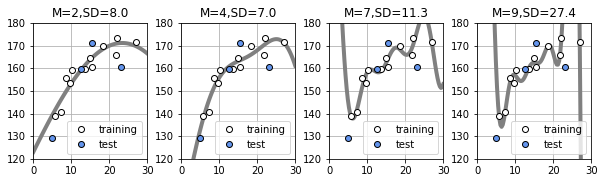

In [37]:
#メイン
plt.figure(figsize=(10,2.5))
plt.subplots_adjust(wspace=0.3)
M=[2,4,7,9]
for i in range(len(M)):
    plt.subplot(1,len(M),i+1)
    W=fit_gauss_func(X_train,T_train,M[i])
    show_gauss_func(W)
    plt.plot(X_train,T_train,marker='o',linestyle='None',color='white',markeredgecolor='black',label='training')
    plt.plot(X_test,T_test,marker='o',linestyle='None',color='cornflowerblue',markeredgecolor='black',label='test')
    plt.legend(loc='lower right',fontsize=10,numpoints=1)
    plt.xlim(X_min,X_max)
    plt.grid(True)
    plt.ylim(120,180)
    mse=mse_gauss_func(X_test,T_test,W)
    plt.title("M={0:d},SD={1:.1f}".format(M[i],np.sqrt(mse)))
plt.show()

訓練データ(白)でwを決め，テストデータ(青)で標準偏差(SD)を計算することで，個数(M)が4のとき最も標準偏差(SD)が小さくなることが分かる．

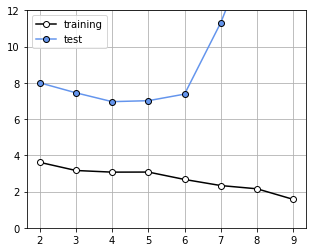

In [38]:
#リスト 5-2-(11)
plt.figure(figsize=(5,4))
M=range(2,10)
mse_train=np.zeros(len(M))
mse_test=np.zeros(len(M))
for i in range(len(M)):
    W=fit_gauss_func(X_train,T_train,M[i])
    mse_train[i]=np.sqrt(mse_gauss_func(X_train,T_train,W))
    mse_test[i]=np.sqrt(mse_gauss_func(X_test,T_test,W))
    
plt.plot(M,mse_train,marker='o',linestyle='-',markerfacecolor='white',markeredgecolor='black',color='black',label='training')
plt.plot(M,mse_test,marker='o',linestyle='-',color='cornflowerblue',markeredgecolor='black',label='test')
plt.legend(loc='upper left',fontsize=10)
plt.grid(True)
plt.ylim(0,12)
plt.show()

上のグラフより，訓練データに対する誤差は個数が増えると減り続けているが，テストデータに対しての誤差は個数が4のとき最小になっている．\
よって，個数が5以上になると過学習が起こっていることが分かる．

ただし，テストデータはどの点を選んだかによって大きく依存してしまう．


教科書P192　”図5.19:データの分け方でホールドアウト検証の結果は異なる”を参照

このばらつきを解消するために**交差検証**という方法を使う．\
**交差検証**とは様々な分割で誤差を計算し平均をするというものである．\
データを分割するパターンの数で，**k-分割交差検証**と呼ぶこともある．

教科書P193　”図5.20:K−分割交差検証(K-fold cross-validation)”を参照

最大の分割数である$K=N$のとき，テストデータの大きさは1となる．\
この場合を特別に**リーブワンアウト交差検証**という．

In [39]:
#リスト 5-2-(12)
#k分割交差検証
def kfold_gauss_func(x,t,m,k):
    n=x.shape[0]
    mse_train=np.zeros(k)
    mse_test=np.zeros(k)
    for i in range(0,k):
        x_test=x[np.fmod(range(n),k)==i] #(A)
        t_test=t[np.fmod(range(n),k)==i] #(A)
        x_train=x[np.fmod(range(n),k)!=i]  #(A)
        t_train=t[np.fmod(range(n),k)!=i]  #(A)
        wm=fit_gauss_func(x_train,t_train,m)
        mse_train[i]=mse_gauss_func(x_train,t_train,wm)
        mse_test[i]=mse_gauss_func(x_test,t_test,wm)
    return mse_train,mse_test

In [40]:
#リスト 5-2-(13)
np.fmod(range(10),5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

*　補足\
np.fmod(n,k)はnをkで割ったときの余りを出力する関数である．

In [41]:
#リスト 5-2-(14)
M=4
K=4
kfold_gauss_func(X,T,M,K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782012,  18.30921743,  47.52459642]))

*　補足\
上の段が訓練データの平均二乗誤差で下の段がテストデータの平均二乗誤差を表している．

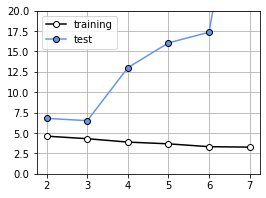

In [42]:
#リスト 5-2-(15)
M=range(2,8)
K=16
Cv_Gauss_train=np.zeros((K,len(M)))
Cv_Gauss_test=np.zeros((K,len(M)))
for i in range(0,len(M)):
    Cv_Gauss_train[:,i],Cv_Gauss_test[:,i]=kfold_gauss_func(X,T,M[i],K)
mean_Gauss_train=np.sqrt(np.mean(Cv_Gauss_train,axis=0))
mean_Gauss_test=np.sqrt(np.mean(Cv_Gauss_test,axis=0))

plt.figure(figsize=(4,3))
plt.plot(M,mean_Gauss_train,marker='o',linestyle='-',markerfacecolor='w',color='k',label='training')
plt.plot(M,mean_Gauss_test,marker='o',linestyle='-',color='cornflowerblue',markeredgecolor='black',label='test')
plt.legend(loc='upper left',fontsize=10)
plt.grid(True)
plt.ylim(0,20)
plt.show()

上のグラフより，訓練データに対する誤差は個数が増えると減り続けているが，テストデータに対しての誤差は個数が3のとき最小になっている．\
よって，個数が3を超えると過学習が起こっていることが分かる．

SD=4.37cm


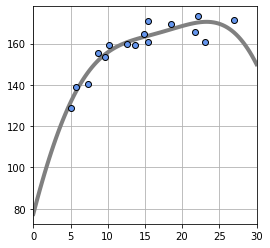

In [43]:
#リスト 5-2-(16)
M=3
plt.figure(figsize=(4,4))
W=fit_gauss_func(X,T,M)
show_gauss_func(W)
plt.plot(X,T,marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.xlim([X_min,X_max])
plt.grid(True)
mse=mse_gauss_func(X,T,W)
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()

標準偏差(SD)が4.37となり，リーブワンアウト交差検証で基底の数が3のとき，予測誤差が最小になった．

# 5.6　新しいモデルの生成

ここまででデータとの誤差が改善されたが，25歳以降になると急激に身長が縮んでいるグラフになっている．\
「身長は年齢と共に増加し，ある一定のところで収束する」を反映させるような新しいモデルについて考える．\
身長と年齢の関係を表す関数は以下のように数式である
$$
y(x)=w_0-w_1exp^{-w_{2}x}
$$
以下はモデルAのイメージである．

教科書P198　”図5.23:新しいモデルA”を参照

この関数をモデルAとする．
モデルAを用いて標準偏差(SD)を計算していく．

In [44]:
#リスト 5-2-(17)
#モデルA
def model_A(x,w):
    y=w[0]-w[1]*np.exp(-w[2]*x)
    return y

In [45]:
#モデルA表示
def show_model_A(w):
    xb=np.linspace(X_min,X_max,100)
    y=model_A(xb,w)
    plt.plot(xb,y,c=[.5,.5,.5],lw=4)

In [46]:
#モデルAのMSE
def mse_model_A(w,x,t):
    y=model_A(x,w)
    mse=np.mean((y-t)**2)
    return mse

In [47]:
#リスト 5-2-(18)
from scipy.optimize import minimize

#モデルAのパラメータの最適化
def fit_model_A(w_init,x,t):
    res1=minimize(mse_model_A,w_init,args=(x,t),method="powell")
    return res1.x

*　補足\
今回のパラメータ($w_{0}，w_{1}，w_{2}$)を決定する際にscipy.optimizeの中のminimizeという関数を用いる．\
これは関数の最小値，最大値を求める**最適化問題**で使われるものである．\
minimize関数の引数はminimize(問題のモデル,初期値,目標関数,メソッドの選択)となっている．\
今回は勾配を使わないpowellと呼ばれるメソッドを使用している．

w0=169.0,w1=113.7,w2=0.2
SD=3.86cm


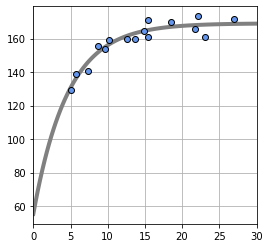

In [48]:
#リスト 5-2-(19)
#メイン
plt.figure(figsize=(4,4))
W_init=[100,0,0]
W=fit_model_A(W_init,X,T)
print("w0={0:.1f},w1={1:.1f},w2={2:.1f}".format(W[0],W[1],W[2]))
show_model_A(W)
plt.plot(X,T,marker='o',linestyle='None',color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min,X_max)
plt.grid(True)
mse=mse_model_A(W,X,T)
print("SD={0:.2f}cm".format(np.sqrt(mse)))
plt.show()

このグラフでは，標準偏差が3.86となりほぼデータの形にフィットしている状態になっている．\
*　補足\
データが少ない状態において交差検証の有効であるが，データ数が多ければ交差するのに時間がかかってしまう．\
その場合はホールドアウト検証が有効であるとされる

# 5.7　モデルの選択

ここでは，モデル間の比較を行うにはどうすればよいのか考えていく．\
異なるモデルで比較する上で重要な考え方は「未知のデータに対する予測精度で評価する」である．\
この考えを踏まえて，モデルAのリーブワンアウト交差検証を行い，他の線形基底関数モデルと比較していく．

In [49]:
#リスト 5-2-(20)
#交差検証 model_A
def kfold_model_A(x,t,k):
    n=len(x)
    mse_train=np.zeros(k)
    mse_test=np.zeros(k)
    for i in range(0,k):
        x_test=x[np.fmod(range(n),k)==i] #(A)
        t_test=t[np.fmod(range(n),k)==i] #(A)
        x_train=x[np.fmod(range(n),k)!=i]  #(A)
        t_train=t[np.fmod(range(n),k)!=i]  #(A)
        wm=fit_model_A(np.array([169,113,0.2]),x_train,t_train)
        mse_train[i]=mse_model_A(wm,x_train,t_train)
        mse_test[i]=mse_model_A(wm,x_test,t_test)
    return mse_train,mse_test

Gauss(M=3) SD=6.51cm
Model A SD=4.72cm


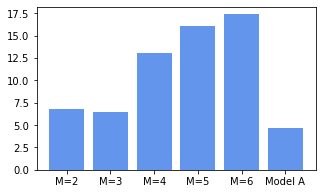

In [50]:
#メイン
K=16
Cv_A_train,Cv_A_test=kfold_model_A(X,T,K)
mean_A_test=np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD={0:.2f}cm".format(mean_Gauss_test[1]))
print("Model A SD={0:.2f}cm".format(mean_A_test))
SD=np.append(mean_Gauss_test[0:5],mean_A_test)
M=range(6)
label=["M=2","M=3","M=4","M=5","M=6","Model A"]
plt.figure(figsize=(5,3))
plt.bar(M,SD,tick_label=label,align="center",facecolor="cornflowerblue")
plt.show()

リーブワンアウト交差検証の結果，新しく考えたモデルAのテストデータの標準偏差(SD)は4.72であった．\
最も標準偏差(SD)が小さいM=3の線形基底関数モデルが6.51出会ったことと比較するとモデルAの有効性を証明することが出来た．

# 5.8　まとめ

予測モデルを考える手順を以下に示す．大まかな流れは基本的に同じである．

教科書P204　”図5.26:予測モデルを作成するまでの流れ”を参照